# G. ANVITH REDDY
# AIE21047
# LAB-5

A1. Use numpy.fft.fft() to transform the speech signal to its spectral domain. Please plot the 
amplitude part of the spectral components and observe it. Use numpy.fft.ifft() to inverse 
transform the frequency spectrum to time domain signal.


C:\Users\anvit\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\anvit\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\anvit\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


FFT DATA:
 [-9.85512436+0.j          2.6204152 -4.06482669j -0.08489414+1.82845742j
 ...  2.26048267+0.93895186j -0.08489414-1.82845742j
  2.6204152 +4.06482669j]
Amplitude:
 [9.85512436 4.83625804 1.83042715 ... 2.4477362  1.83042715 4.83625804]
Frequencies:
 [ 0.          0.31459552  0.62919104 ... -0.94378656 -0.62919104
 -0.31459552]


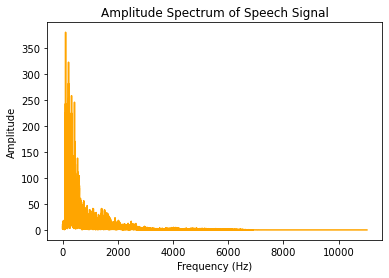

In [1]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import librosa

signal, rs = librosa.load("statement.wav")

fft_data = np.fft.fft(signal)
amplitude = np.abs(fft_data)

frequencies = np.fft.fftfreq(len(signal), d=1/rs)

print("FFT DATA:\n",fft_data)
print("Amplitude:\n",amplitude)
print("Frequencies:\n",frequencies)


import numpy as np
import matplotlib.pyplot as plt
import librosa

# Load the speech signal
signal, rs = librosa.load("statement.wav")

# Perform FFT
fft_result = np.fft.fft(signal)

# Compute amplitude spectrum
amplitude_spectrum = np.abs(fft_result)

# Convert frequency axis to Hertz
freq_axis = np.fft.fftfreq(len(signal), 1 / rs)
positive_freq_axis = freq_axis[:len(freq_axis)//2]  # Keep positive frequencies

# Plot amplitude spectrum with frequency in Hz
plt.plot(positive_freq_axis, amplitude_spectrum[:len(freq_axis)//2],color = "orange")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Amplitude Spectrum of Speech Signal')
plt.show()


C:\Users\anvit\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


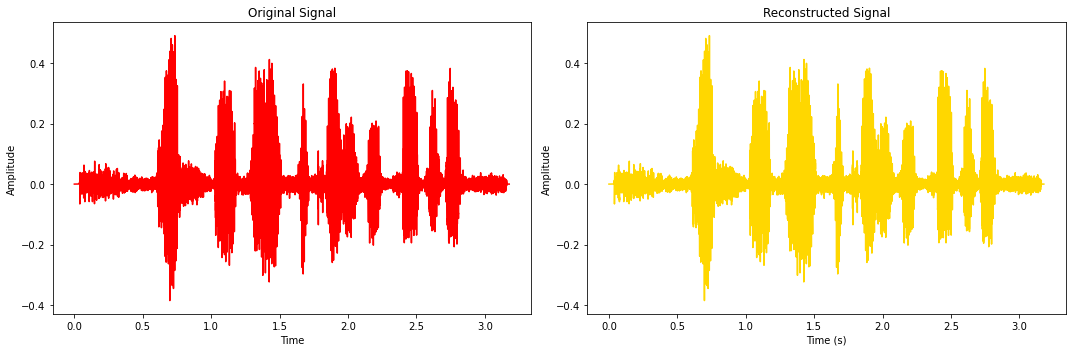

In [2]:
time_domain = np.fft.ifft(fft_data)
time_domain = time_domain[:len(signal)]


time = np.linspace(0, len(signal)/rs, len(signal))
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(time,signal,color = 'red')
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Original Signal")

plt.subplot(1, 2, 2)
plt.plot(time, time_domain,color = "gold")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Reconstructed Signal")

plt.tight_layout()
plt.show()

A2. Use a rectangular window to select the low frequency components from your spectrum. Inverse 
transform the filtered spectrum and listen to this sound. Repeat the same for band pass and high 
pass frequencies of spectrum.

In [17]:
import numpy as np
import scipy.io.wavfile as wavfile
from IPython.display import Audio

# Load the speech signal
sample_rate, signal = wavfile.read("statement.wav")

# Perform FFT to transform the speech signal to spectral domain
fft_result = np.fft.fft(signal)

# Define windows for low-pass, bandpass, and high-pass filters
rectangular_window_lowpass = np.zeros_like(fft_result)
rectangular_window_lowpass[:int(len(fft_result) * 0.1)] = 1  # Low-pass filter

rectangular_window_bandpass = np.zeros_like(fft_result)
rectangular_window_bandpass[int(len(fft_result) * 0.2):int(len(fft_result) * 0.8)] = 1  # Bandpass filter

rectangular_window_highpass = np.zeros_like(fft_result)
rectangular_window_highpass[int(len(fft_result) * 0.8):] = 1  # High-pass filter

# Filter the spectrum using rectangular windows
filtered_fft_result_lowpass = fft_result * rectangular_window_lowpass
filtered_fft_result_bandpass = fft_result * rectangular_window_bandpass
filtered_fft_result_highpass = fft_result * rectangular_window_highpass

# Inverse transform the filtered spectra
filtered_signal_lowpass = np.fft.ifft(filtered_fft_result_lowpass)
filtered_signal_bandpass = np.fft.ifft(filtered_fft_result_bandpass)
filtered_signal_highpass = np.fft.ifft(filtered_fft_result_highpass)

# Save the filtered signals as audio files
wavfile.write('filtered_sound_lowpass.wav', sample_rate, np.real(filtered_signal_lowpass).astype(np.int16))
wavfile.write('filtered_sound_bandpass.wav', sample_rate, np.real(filtered_signal_bandpass).astype(np.int16))
wavfile.write('filtered_sound_highpass.wav', sample_rate, np.real(filtered_signal_highpass).astype(np.int16))

# Display audio files for playback
print('LowPass filtered Sound:')
display(Audio(filename='filtered_sound_lowpass.wav'))
print('\n BandPass filtered Sound:')
display(Audio(filename='filtered_sound_bandpass.wav'))
print('\n HighPass filtered Sound:')
display(Audio(filename='filtered_sound_highpass.wav'))


LowPass filtered Sound:



 BandPass filtered Sound:



 HighPass filtered Sound:


A3. Repeat A2 with other filter types such as Cosine / Gausian filters.


In [15]:
import numpy as np
import scipy.io.wavfile as wavfile
from IPython.display import Audio

# Load the speech signal
sample_rate, signal = wavfile.read("statement.wav")

# Define cosine and gaussian windows
cosine_window = np.cos(np.linspace(0, np.pi, len(signal)))
gaussian_window = np.exp(-(np.linspace(-1, 1, len(signal))) ** 2)

# Filter the spectrum using cosine and gaussian windows
filtered_fft_result_cosine = np.fft.fft(signal * cosine_window)
filtered_fft_result_gaussian = np.fft.fft(signal * gaussian_window)

# Inverse transform the filtered spectra
filtered_signal_cosine = np.fft.ifft(filtered_fft_result_cosine)
filtered_signal_gaussian = np.fft.ifft(filtered_fft_result_gaussian)

# Save the filtered signals as audio files
wavfile.write('filtered_sound_cosine.wav', sample_rate, np.real(filtered_signal_cosine).astype(np.int16))
wavfile.write('filtered_sound_gaussian.wav', sample_rate, np.real(filtered_signal_gaussian).astype(np.int16))

# Display audio files for playback
print('Cosine filtered Sound:')
display(Audio(filename='filtered_sound_cosine.wav'))
print('\n Gaussian filtered Sound:')
display(Audio(filename='filtered_sound_gaussian.wav'))


Cosine filtered Sound:



 Gaussian filtered Sound:
